In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
def f(t, y):
    return -y / t + np.sin(t)


def y_true_func(t):
    return (np.sin(t) - t * np.cos(t) - np.pi + 1) / t


t0, t1 = np.pi, np.pi + 1
y0 = 1 / np.pi
h = 0.1

In [126]:
def euler(f, t0, y0, t1, h=0.1):
    """
    Функция, решающяя дифференциальное уравнение через метод Эйлера
    """
    n = int((t1 - t0) // h)  # количество отрезков разбиения

    t_arr = np.linspace(t0, t1, n + 1)  # разбиваем время на нужное количество отрезков
    y_arr = np.zeros(n + 1)

    y_arr[0] = y0
    for i in range(n):  # вычисляем y в точках разбиения
        y_arr[i + 1] = y_arr[i] + h * f(t_arr[i], y_arr[i])
    return t_arr, y_arr

In [127]:
def rkfixed(f, t0, y0, t1, h=0.1):
    """
    Функция, решающяя дифференциальное уравнение через метод Рунге-Кутты
    """
    n = int((t1 - t0) // h)  # количество отрезков разбиения

    t_arr = np.linspace(t0, t1, n + 1)  # разбиваем время на нужное количество отрезков
    y_arr = np.zeros(n + 1)

    y_arr[0] = y0
    for i in range(n):
        k1 = f(t_arr[i], y_arr[i])
        k2 = f(t_arr[i] + 0.5 * h, y_arr[i] + 0.5 * h * k1)
        k3 = f(t_arr[i] + 0.5 * h, y_arr[i] + 0.5 * h * k2)
        k4 = f(t_arr[i] + h, y_arr[i] + h * k3)
        k = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y_arr[i + 1] = y_arr[i] + h * k
    return t_arr, y_arr

In [128]:
t_euler, y_euler = euler(f, t0, y0, t1, h)
t_rk, y_rk = rkfixed(f, t0, y0, t1, h)

t_true = np.linspace(t0, t1, 10)
y_true = y_true_func(t_true)

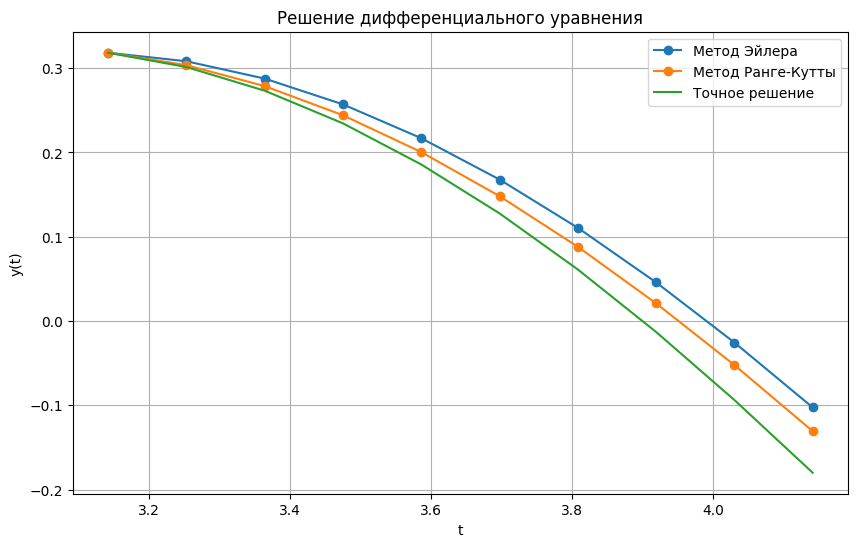

In [129]:
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler, '-o', label='Метод Эйлера')
plt.plot(t_rk, y_rk, '-o', label='Метод Ранге-Кутты')
plt.plot(t_true, y_true, label='Точное решение')
plt.title('Решение дифференциального уравнения')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)

In [135]:
def runge_error(method, f, t0, y0, t1, h, p):
    t_h, y_h = method(f, t0, y0, t1, h)  # для h
    t_h_2, y_h_2 = method(f, t0, y0, t1, h / 2)  # для h / 2
    return (y_h_2[::2] - y_h) / (2 ** p - 1)


print(f'Ошибка для метода Эйлера: {np.abs(y_euler - y_true).max()}')
print(f'Ошибка Рунге для метода Эйлера: {np.abs(runge_error(euler, f, t0, y0, t1, h, 4)).max()}')
print()
print(f'Ошибка для метода Рунге-Кутте: {np.abs(y_rk - y_true).max()}')
print(f'Ошибка Рунге для метода Рунге-Кутте: {np.abs(runge_error(rkfixed, f, t0, y0, t1, h, 4)).max()}')

Ошибка для метода Эйлера: 0.07746531768740524
Ошибка Рунге для метода Эйлера: 0.0003748487464675265

Ошибка для метода Рунге-Кутте: 0.04930275316444549
Ошибка Рунге для метода Рунге-Кутте: 0.0009317231064264057
